In [2]:
import numpy as np
x_npy_path = "scRNA-seq/X_processed_minmax_quantile.npy"
y_npy_path = "scRNA-seq/y_labels.npy"

y = np.load(y_npy_path)

X_full = np.load(x_npy_path); y = np.load(y_npy_path)
print(X_full.shape)
print(y.shape)
D = X_full.shape[1]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
seed = 0
n_jobs = -1
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)

fold_acc = []
for k, (tr_idx, te_idx) in enumerate(skf.split(X_full, y), start=1):
    X_tr, X_te = X_full[tr_idx], X_full[te_idx]
    y_tr, y_te = y[tr_idx], y[te_idx]

    clf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=3,
        random_state=seed,
        n_jobs=n_jobs
    )
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    fold_acc.append(acc)
    print(f"Fold {k} accuracy: {acc:.4f}")

print(f"Mean accuracy (2-fold): {np.mean(fold_acc):.4f} ± {np.std(fold_acc, ddof=1):.4f}")


(801, 1500)
(801,)
Fold 1 accuracy: 0.9950
Fold 2 accuracy: 0.9950
Mean accuracy (2-fold): 0.9950 ± 0.0000


# LOCO

In [26]:
from Flow_Disentangle_Feature_Importance import LOCOEstimator_cls
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
import numpy as np

estimator1 = LOCOEstimator_cls(
        random_state=0,
        regressor =  RandomForestClassifier(
                n_estimators=300,
                max_depth=None,
                min_samples_leaf=3,
                random_state=seed,
                n_jobs=n_jobs
                )

)

phi_0_loco, se_0_loco = estimator1.importance(X_full, y)


print("Feature\tLOCO φ\tStdError")
for j, (phi_j, se_j) in enumerate(zip(phi_0_loco, se_0_loco)):
    print(f"{j:>3d}\t{phi_j: .4f}\t{se_j: .4f}")
print(f"Sum of LOCO: {D* np.mean(phi_0_loco)}")



phi_0_loco_test = phi_0_loco 

se_0_loco_test = se_0_loco 

z_score_0_loco = phi_0_loco_test / se_0_loco_test

p_value_0_loco = 1 - norm.cdf(z_score_0_loco)
rounded_p_value_0_loco = np.round(p_value_0_loco, 3)

print(rounded_p_value_0_loco)


alpha = 0.05 / 1500  


mask = (p_value_0_loco <= alpha).astype(int)

print(mask)

Feature	LOCO φ	StdError
  0	 0.0014	 0.0013
  1	 0.0009	 0.0013
  2	 0.0012	 0.0013
  3	 0.0013	 0.0013
  4	 0.0015	 0.0013
  5	 0.0006	 0.0013
  6	 0.0006	 0.0013
  7	 0.0005	 0.0013
  8	 0.0005	 0.0013
  9	 0.0009	 0.0013
 10	 0.0006	 0.0013
 11	 0.0005	 0.0013
 12	 0.0006	 0.0013
 13	 0.0004	 0.0013
 14	 0.0004	 0.0013
 15	 0.0019	 0.0013
 16	 0.0002	 0.0012
 17	 0.0004	 0.0012
 18	 0.0005	 0.0012
 19	 0.0013	 0.0012
 20	 0.0012	 0.0012
 21	 0.0011	 0.0012
 22	 0.0011	 0.0012
 23	 0.0010	 0.0012
 24	 0.0009	 0.0012
 25	 0.0008	 0.0012
 26	 0.0006	 0.0012
 27	 0.0007	 0.0012
 28	 0.0016	 0.0013
 29	 0.0011	 0.0013
 30	 0.0011	 0.0013
 31	 0.0011	 0.0013
 32	 0.0011	 0.0013
 33	 0.0010	 0.0013
 34	 0.0009	 0.0013
 35	 0.0009	 0.0012
 36	 0.0009	 0.0012
 37	 0.0006	 0.0012
 38	 0.0007	 0.0012
 39	 0.0005	 0.0012
 40	 0.0004	 0.0012
 41	 0.0004	 0.0012
 42	 0.0006	 0.0012
 43	 0.0008	 0.0012
 44	 0.0006	 0.0012
 45	 0.0009	 0.0012
 46	 0.0004	 0.0012
 47	 0.0004	 0.0012
 48	 0.0006	 0.0

In [27]:
mask = (p_value_0_loco <= alpha).astype(int)
vals, cnts = np.unique(mask, return_counts=True)
print(dict(zip(vals, cnts)))  

mask1 = (p_value_0_loco <= 0.05).astype(int)
vals1, cnts1 = np.unique(mask1, return_counts=True)
print(dict(zip(vals1, cnts1)))

{np.int64(0): np.int64(1500)}
{np.int64(0): np.int64(1385), np.int64(1): np.int64(115)}


# CPI

In [2]:
from Flow_Disentangle_Feature_Importance import CPIEstimator_cls
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
import numpy as np

estimator2 = CPIEstimator_cls(
        random_state=0,
        regressor =  RandomForestClassifier(
                n_estimators=300,
                max_depth=None,
                min_samples_leaf=3,
                random_state=seed,
                n_jobs=n_jobs
                )
)

phi_0_cpi, se_0_cpi = estimator2.importance(X_full, y)

print("Feature\tCPI φ\tStdError")
for j, (phi_j, se_j) in enumerate(zip(phi_0_cpi, se_0_cpi)):
    print(f"{j:>3d}\t{phi_j: .4f}\t{se_j: .4f}")
print(f"Sum of CPI: {D* np.mean(phi_0_cpi)}")

phi_0_cpi_test = phi_0_cpi 
se_0_cpi_test = se_0_cpi 

z_score_0_cpi = phi_0_cpi_test / se_0_cpi_test

p_value_0_cpi = 1 - norm.cdf(z_score_0_cpi)
rounded_p_value_0_cpi = np.round(p_value_0_cpi, 3)

print(rounded_p_value_0_cpi)

alpha = 0.05 / 1500  

mask = (p_value_0_cpi <= alpha).astype(int)

print(mask)


/root/miniconda3/lib/python3.12/site-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
CPI conditional permutation: 100%|██████████| 1500/1500 [44:27<00:00,  1.78s/it]

Feature	CPI φ	StdError
  0	 0.0000	 0.0000
  1	 0.0000	 0.0000
  2	 0.0000	 0.0000
  3	 0.0000	 0.0000
  4	 0.0000	 0.0000
  5	 0.0000	 0.0000
  6	 0.0000	 0.0000
  7	 0.0000	 0.0000
  8	 0.0000	 0.0000
  9	 0.0001	 0.0000
 10	 0.0000	 0.0000
 11	 0.0000	 0.0000
 12	 0.0000	 0.0000
 13	 0.0000	 0.0000
 14	 0.0000	 0.0000
 15	 0.0000	 0.0000
 16	 0.0000	 0.0000
 17	 0.0000	 0.0000
 18	 0.0000	 0.0000
 19	 0.0000	 0.0000
 20	 0.0000	 0.0000
 21	 0.0000	 0.0000
 22	 0.0000	 0.0000
 23	 0.0000	 0.0000
 24	 0.0000	 0.0000
 25	 0.0000	 0.0000
 26	 0.0000	 0.0000
 27	 0.0000	 0.0000
 28	 0.0000	 0.0000
 29	 0.0000	 0.0000
 30	 0.0000	 0.0000
 31	 0.0000	 0.0000
 32	 0.0000	 0.0000
 33	 0.0000	 0.0000
 34	 0.0000	 0.0000
 35	 0.0000	 0.0000
 36	 0.0000	 0.0000
 37	 0.0000	 0.0000
 38	 0.0000	 0.0000
 39	 0.0000	 0.0000
 40	 0.0000	 0.0000
 41	 0.0000	 0.0000
 42	 0.0000	 0.0000
 43	 0.0000	 0.0000
 44	 0.0000	 0.0000
 45	 0.0000	 0.0000
 46	 0.0000	 0.0000
 47	 0.0000	 0.0000
 48	 0.0000	 0.00

In [3]:
mask = (p_value_0_cpi <= alpha).astype(int)
vals, cnts = np.unique(mask, return_counts=True)
print(dict(zip(vals, cnts)))  

mask1 = (p_value_0_cpi <= 0.05).astype(int)
vals1, cnts1 = np.unique(mask1, return_counts=True)
print(dict(zip(vals1, cnts1)))

{np.int64(0): np.int64(1499), np.int64(1): np.int64(1)}
{np.int64(0): np.int64(1496), np.int64(1): np.int64(4)}


# FDFI

/root/miniconda3/lib/python3.12/site-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Training: 100%|█████████████████████████████████| 12000/12000 [00:27<00:00, 440.58it/s, loss=0.7508]


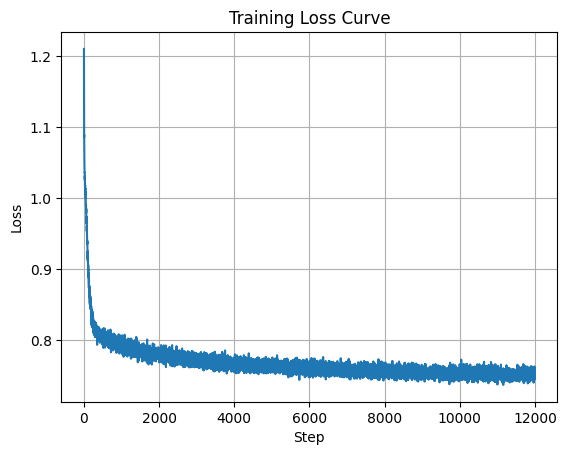

In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from Flow_Disentangle_Feature_Importance import FlowMatchingModel

model = FlowMatchingModel(
    X=X_full,
    dim=D,
    device=device,
    hidden_dim=512,        
    time_embed_dim=64,     
    num_blocks=1,
    use_bn=False,
    seed=0
)
model.fit(num_steps=12000, batch_size=256, lr=1e-3, show_plot=True)

In [3]:
from Flow_Disentangle_Feature_Importance import CPI_Flow_Model_Estimator_cls
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
import numpy as np

estimator3 = CPI_Flow_Model_Estimator_cls(
    random_state=0,
    regressor =  RandomForestClassifier(
                n_estimators=300,
                max_depth=None,
                min_samples_leaf=3,
                random_state=seed,
                n_jobs=n_jobs
                ),
    flow_model=model
)

phi_x_cpi, se_x_cpi = estimator3.importance(X_full, y)

print("Feature\tFDFI φ\tStdError")
for j, (phi_j, se_j) in enumerate(zip(phi_x_cpi, se_x_cpi)):
    print(f"{j:>3d}\t{phi_j: .4f}\t{se_j: .4f}")
print(f"Sum of FDFI: {D* np.mean(phi_x_cpi)}")

phi_x_cpi_test = phi_x_cpi 

se_x_cpi_test = se_x_cpi 

z_score_x_cpi = phi_x_cpi_test / se_x_cpi_test

p_value_x_cpi = 1 - norm.cdf(z_score_x_cpi)
rounded_p_value_x_cpi = np.round(p_value_x_cpi, 3)

print(rounded_p_value_x_cpi)

alpha = 0.05 / 1500  

mask = (p_value_x_cpi <= alpha).astype(int)

print(mask)



CPI@Z (resample) → decode → X (cls CE): 100%|██████████| 1500/1500 [13:26<00:00,  1.86it/s]
/root/autodl-tmp/Module_Flow_Disentangle_Feature_Importance/Flow_Disentangle_Feature_Importance/Flow_Matching/flow_matching.py:213: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  t_tensor = torch.tensor([[float(t_scalar)]], dtype=torch.float32, device=self.device)
CPI@Z (resample) → decode → X (cls CE): 100%|██████████| 1500/1500 [13:26<00:00,  1.86it/s]


Feature	FDFI φ	StdError
  0	 0.0004	 0.0002
  1	 0.0004	 0.0002
  2	 0.0006	 0.0001
  3	 0.0009	 0.0001
  4	 0.0012	 0.0003
  5	 0.0002	 0.0001
  6	 0.0006	 0.0002
  7	 0.0005	 0.0002
  8	 0.0004	 0.0001
  9	 0.0012	 0.0002
 10	 0.0004	 0.0002
 11	 0.0004	 0.0002
 12	 0.0008	 0.0002
 13	 0.0003	 0.0001
 14	 0.0009	 0.0003
 15	 0.0013	 0.0002
 16	 0.0005	 0.0003
 17	 0.0005	 0.0002
 18	 0.0005	 0.0002
 19	 0.0007	 0.0001
 20	 0.0002	 0.0001
 21	 0.0001	 0.0003
 22	 0.0003	 0.0001
 23	 0.0002	 0.0001
 24	 0.0013	 0.0004
 25	 0.0001	 0.0003
 26	 0.0003	 0.0002
 27	 0.0001	 0.0001
 28	 0.0004	 0.0002
 29	 0.0002	 0.0002
 30	 0.0004	 0.0002
 31	 0.0000	 0.0000
 32	 0.0005	 0.0002
 33	 0.0001	 0.0001
 34	 0.0003	 0.0001
 35	 0.0004	 0.0004
 36	 0.0003	 0.0001
 37	 0.0005	 0.0003
 38	 0.0004	 0.0001
 39	 0.0003	 0.0002
 40	 0.0003	 0.0001
 41	 0.0001	 0.0001
 42	 0.0001	 0.0002
 43	 0.0013	 0.0005
 44	 0.0007	 0.0002
 45	 0.0002	 0.0001
 46	 0.0003	 0.0002
 47	 0.0002	 0.0002
 48	 0.0006	 0.0

In [4]:
mask = (p_value_x_cpi <= alpha).astype(int)
vals, cnts = np.unique(mask, return_counts=True)
print(dict(zip(vals, cnts)))  

mask1 = (p_value_x_cpi <= 0.05).astype(int)
vals1, cnts1 = np.unique(mask1, return_counts=True)
print(dict(zip(vals1, cnts1)))

{np.int64(0): np.int64(1421), np.int64(1): np.int64(79)}
{np.int64(0): np.int64(756), np.int64(1): np.int64(744)}


# DFI

In [15]:
from Flow_Disentangle_Feature_Importance import  DFIEstimator_cls
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
import numpy as np
print(X_full.shape)
estimator4 = DFIEstimator_cls(
    random_state=0,
    regressor =  RandomForestClassifier(
                n_estimators=300,
                max_depth=None,
                min_samples_leaf=3,
                random_state=seed,
                n_jobs=n_jobs
                )
)

phi_x_dfi, se_x_dfi = estimator4.importance(X_full, y)


print("Feature\tDFI φ\tStdError")
for j, (phi_j, se_j) in enumerate(zip(phi_x_dfi, se_x_dfi)):
    print(f"{j:>3d}\t{phi_j: .4f}\t{se_j: .4f}")
print(f"Sum of DFI: {D* np.mean(phi_x_dfi)}")

phi_x_dfi_test = phi_x_dfi 

se_x_dfi_test = se_x_dfi 

z_score_x_dfi = phi_x_dfi_test / se_x_dfi_test


p_value_x_dfi = 1 - norm.cdf(z_score_x_dfi)
rounded_p_value_x_dfi = np.round(p_value_x_dfi, 3)

print(rounded_p_value_x_dfi)

alpha = 0.05 / 1500  

mask = (p_value_x_dfi <= alpha).astype(int)

print(mask)



(801, 1500)
Feature	DFI φ	StdError
  0	 0.1176	 0.0019
  1	 0.1493	 0.0027
  2	 0.1121	 0.0018
  3	 0.1074	 0.0014
  4	 0.0859	 0.0012
  5	 0.1225	 0.0021
  6	 0.0936	 0.0010
  7	 0.1737	 0.0032
  8	 0.1666	 0.0031
  9	 0.1212	 0.0018
 10	 0.0962	 0.0013
 11	 0.0877	 0.0009
 12	 0.1361	 0.0017
 13	 0.1435	 0.0026
 14	 0.1571	 0.0019
 15	 0.1447	 0.0016
 16	 0.0913	 0.0010
 17	 0.0787	 0.0009
 18	 0.1277	 0.0017
 19	 0.0801	 0.0011
 20	 0.0809	 0.0012
 21	 0.1193	 0.0014
 22	 0.1499	 0.0028
 23	 0.1174	 0.0015
 24	 0.1201	 0.0014
 25	 0.1326	 0.0016
 26	 0.0823	 0.0013
 27	 0.0822	 0.0010
 28	 0.0901	 0.0012
 29	 0.0695	 0.0009
 30	 0.1574	 0.0029
 31	 0.1072	 0.0014
 32	 0.1144	 0.0014
 33	 0.0793	 0.0009
 34	 0.1094	 0.0016
 35	 0.1161	 0.0014
 36	 0.1259	 0.0017
 37	 0.0845	 0.0010
 38	 0.0924	 0.0013
 39	 0.1084	 0.0012
 40	 0.1430	 0.0027
 41	 0.0647	 0.0009
 42	 0.1091	 0.0012
 43	 0.1127	 0.0013
 44	 0.0976	 0.0014
 45	 0.1210	 0.0022
 46	 0.0825	 0.0010
 47	 0.0877	 0.0011
 48	 

In [16]:
mask = (p_value_x_dfi <= alpha).astype(int)
vals, cnts = np.unique(mask, return_counts=True)
print(dict(zip(vals, cnts)))  

mask1 = (p_value_x_dfi <= 0.05).astype(int)
vals1, cnts1 = np.unique(mask1, return_counts=True)
print(dict(zip(vals1, cnts1)))

{np.int64(1): np.int64(1500)}
{np.int64(1): np.int64(1500)}



# ad hoc method

## CPI

In [4]:
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

print("X shape:", X_full.shape)
print("y shape:", y.shape)

n, D = X_full.shape

ctg_names = [
    "LB","AC","FM","UC","DL","DS","DP",
    "ASTV","MSTV","ALTV","MLTV",
    "Width","Min","Max","Nmax","Nzeros","Mode","Mean","Median","Variance","Tendency"
]
feature_names = ctg_names if D == 21 else [f"f{i}" for i in range(D)]
X_df = pd.DataFrame(X_full, columns=feature_names)

corr = spearmanr(X_df).correlation
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1.0)
corr = np.nan_to_num(corr, nan=0.0, posinf=0.0, neginf=0.0)

distance_matrix = 1.0 - np.abs(corr)
linkage = hierarchy.ward(squareform(distance_matrix))

t = 1.075  # 1.075
cluster_ids = hierarchy.fcluster(linkage, t, criterion="distance")
cluster_to_ids = defaultdict(list)
for idx, cid in enumerate(cluster_ids):
    cluster_to_ids[cid].append(idx)

def select_representatives(
    X: np.ndarray,
    y: np.ndarray,
    cluster_to_ids: dict,
    corr_abs: np.ndarray,           # |spearman|
    dist: np.ndarray,               # 1 - |spearman|
    strategy: str = "medoid",
    random_state: int = 0
):
    rng = np.random.RandomState(random_state)
    selected = []

    for cid, ids in cluster_to_ids.items():
        ids = list(ids)
        if len(ids) == 1:
            selected.append(ids[0])
            continue

        if strategy == "first":
            chosen = ids[0]

        elif strategy == "medoid":
            subD = dist[np.ix_(ids, ids)]
            sums = np.sum(subD, axis=1)
            chosen = ids[int(np.argmin(sums))]
        selected.append(chosen)

    return selected

strategy = "medoid"   
selected_feature_idx = select_representatives(
    X_full, y, cluster_to_ids,
    corr_abs=np.abs(corr),
    dist=distance_matrix,
    strategy=strategy,
    random_state=0
)
selected_feature_names = [feature_names[i] for i in selected_feature_idx]
print(f"[{strategy}] selected numbers: {len(selected_feature_idx)}")
print(" selected names:", selected_feature_names)

X_subset = X_full[:, selected_feature_idx]

seed = 0
n_jobs = -1
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)

fold_acc = []
for k, (tr_idx, te_idx) in enumerate(skf.split(X_subset, y), start=1):
    X_tr, X_te = X_subset[tr_idx], X_subset[te_idx]
    y_tr, y_te = y[tr_idx], y[te_idx]

    clf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=3,
        random_state=seed,
        n_jobs=n_jobs
    )
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    fold_acc.append(acc)
    print(f"Fold {k} accuracy (selected features): {acc:.4f}")

print(f"Mean accuracy (2-fold, selected features): {np.mean(fold_acc):.4f} ± {np.std(fold_acc, ddof=1):.4f}")


X shape: (801, 1500)
y shape: (801,)
[medoid] selected numbers: 100
 selected names: ['f28', 'f78', 'f493', 'f86', 'f819', 'f468', 'f129', 'f391', 'f15', 'f17', 'f472', 'f24', 'f25', 'f404', 'f822', 'f486', 'f164', 'f38', 'f41', 'f541', 'f1166', 'f47', 'f292', 'f50', 'f51', 'f781', 'f180', 'f1018', 'f715', 'f217', 'f106', 'f104', 'f77', 'f963', 'f231', 'f698', 'f510', 'f620', 'f1119', 'f767', 'f215', 'f427', 'f1209', 'f974', 'f517', 'f629', 'f222', 'f396', 'f272', 'f193', 'f183', 'f859', 'f684', 'f951', 'f480', 'f590', 'f1290', 'f918', 'f1339', 'f514', 'f1169', 'f635', 'f273', 'f1402', 'f805', 'f852', 'f917', 'f420', 'f876', 'f690', 'f504', 'f431', 'f1087', 'f400', 'f1297', 'f579', 'f1348', 'f423', 'f742', 'f471', 'f893', 'f1056', 'f826', 'f1129', 'f557', 'f1282', 'f565', 'f608', 'f564', 'f582', 'f585', 'f874', 'f764', 'f1041', 'f1433', 'f699', 'f1408', 'f837', 'f760', 'f1029']
Fold 1 accuracy (selected features): 0.9975
Fold 2 accuracy (selected features): 0.9975
Mean accuracy (2-fold

In [5]:
from Flow_Disentangle_Feature_Importance import CPIEstimator_cls
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
import numpy as np

estimator5 = CPIEstimator_cls(
        random_state=0,
        regressor =  RandomForestClassifier(
                n_estimators=300,
                max_depth=None,
                min_samples_leaf=3,
                random_state=seed,
                n_jobs=n_jobs
                )

)

phi_0_cpi_ad_hoc, se_0_cpi_ad_hoc = estimator5.importance(X_subset, y)


print("Feature\tCPI__ad_hoc φ\tStdError")
for j, (phi_j, se_j) in enumerate(zip(phi_0_cpi_ad_hoc, se_0_cpi_ad_hoc)):
    print(f"{j:>3d}\t{phi_j: .4f}\t{se_j: .4f}")
print(f"Sum of CPI__ad_hoc: {D* np.mean(phi_0_cpi_ad_hoc)}")


phi_0_cpi_test_ad_hoc = phi_0_cpi_ad_hoc 

se_0_cpi_test_ad_hoc = se_0_cpi_ad_hoc 

z_score_0_cpi_ad_hoc = phi_0_cpi_test_ad_hoc / se_0_cpi_ad_hoc

p_value_0_cpi_ad_hoc = 1 - norm.cdf(z_score_0_cpi_ad_hoc)
rounded_p_value_0_cpi_ad_hoc = np.round(p_value_0_cpi_ad_hoc, 3)

print(rounded_p_value_0_cpi_ad_hoc)

alpha = 0.05 / 100  

mask = (p_value_0_cpi_ad_hoc <= alpha).astype(int)

print(mask)




CPI conditional permutation: 100%|██████████| 100/100 [00:53<00:00,  1.88it/s]

Feature	CPI__ad_hoc φ	StdError
  0	 0.0005	 0.0005
  1	 0.0003	 0.0003
  2	 0.0000	 0.0003
  3	 0.0003	 0.0005
  4	 0.0000	 0.0003
  5	 0.0003	 0.0004
  6	 0.0000	 0.0003
  7	 0.0001	 0.0003
  8	 0.0000	 0.0003
  9	 0.0000	 0.0003
 10	 0.0000	 0.0003
 11	 0.0000	 0.0003
 12	 0.0000	 0.0003
 13	 0.0000	 0.0003
 14	 0.0000	 0.0003
 15	 0.0000	 0.0003
 16	 0.0002	 0.0004
 17	 0.0000	 0.0003
 18	 0.0000	 0.0003
 19	 0.0000	 0.0003
 20	 0.0000	 0.0003
 21	 0.0000	 0.0003
 22	 0.0000	 0.0003
 23	 0.0000	 0.0003
 24	 0.0002	 0.0003
 25	 0.0000	 0.0003
 26	 0.0000	 0.0003
 27	 0.0000	 0.0003
 28	 0.0000	 0.0003
 29	 0.0000	 0.0003
 30	 0.0000	 0.0003
 31	 0.0000	 0.0003
 32	 0.0000	 0.0003
 33	 0.0000	 0.0003
 34	 0.0000	 0.0003
 35	 0.0001	 0.0003
 36	 0.0000	 0.0003
 37	 0.0000	 0.0003
 38	 0.0000	 0.0003
 39	 0.0000	 0.0003
 40	 0.0002	 0.0003
 41	 0.0000	 0.0003
 42	 0.0000	 0.0003
 43	 0.0000	 0.0003
 44	 0.0000	 0.0003
 45	 0.0000	 0.0003
 46	 0.0000	 0.0003
 47	 0.0000	 0.0003
 48	 0.00

In [25]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


top_k = 2
D = X_full.shape[1]

phi_safe = np.nan_to_num(phi_0_cpi_ad_hoc, nan=-np.inf, posinf=-np.inf, neginf=-np.inf)


top_k = min(top_k, D)
selected_feature_idx = np.argsort(phi_safe)[-top_k:][::-1].tolist()

print(f"Top-{top_k} feature indices by CPI_ad_hoc:")
for rank, j in enumerate(selected_feature_idx, start=1):
    print(f"  #{rank}: idx={j:4d}, CPI_ad_hoc={phi_0_cpi_ad_hoc[j]:.6f}, SE={se_0_cpi_ad_hoc[j]:.6f}")

X_subset = X_full[:, selected_feature_idx]

seed = 0
n_jobs = n_jobs
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)

fold_acc = []
for k, (tr_idx, te_idx) in enumerate(skf.split(X_subset, y), start=1):
    X_tr, X_te = X_subset[tr_idx], X_subset[te_idx]
    y_tr, y_te = y[tr_idx], y[te_idx]

    clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_leaf=1,
        random_state=seed,
        n_jobs=n_jobs
    )
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    fold_acc.append(acc)
    print(f"Fold {k} accuracy (selected features): {acc:.4f}")

print(f"Mean accuracy (2-fold, selected features): {np.mean(fold_acc):.4f} ± {np.std(fold_acc, ddof=1):.4f}")

print("Selected indices:", selected_feature_idx)


Top-2 feature indices by CPI_ad_hoc:
  #1: idx=   0, CPI_ad_hoc=0.000504, SE=0.000535
  #2: idx=   3, CPI_ad_hoc=0.000323, SE=0.000453
Fold 1 accuracy (selected features): 0.7481
Fold 2 accuracy (selected features): 0.7275
Mean accuracy (2-fold, selected features): 0.7378 ± 0.0146
Selected indices: [0, 3]


| Top-k | Accuracy | Std |
|:------|:---------:|:---------:|
| Top-50 | 0.9938 | ±0.0018 |
| Top-40 | 0.9925 | ±0.0000 |
| Top-30 | 0.9900 | ±0.0035 |
| Top-20 | 0.9950 | ±0.0000 |
| Top-10 | 0.9475 | ±0.0088 |
| Top-8 | 0.9463 | ±0.0125 |
| Top-6 | 0.9276 | ±0.0069 |
| Top-4 | 0.7840 | ±0.0092 |
| Top-2 | 0.7378 | ±0.0146 |

# FDFI

In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

top_k = 2

D = X_full.shape[1]

phi_safe = np.nan_to_num(phi_x_cpi, nan=-np.inf, posinf=-np.inf, neginf=-np.inf)

top_k = min(top_k, D)
selected_feature_idx = np.argsort(phi_safe)[-top_k:][::-1].tolist()

print(f"Top-{top_k} feature indices by FDFI:")
for rank, j in enumerate(selected_feature_idx, start=1):
    print(f"  #{rank}: idx={j:4d}, FDFI={phi_x_cpi[j]:.6f}, SE={se_x_cpi[j]:.6f}")

X_subset = X_full[:, selected_feature_idx]

seed = 0
n_jobs = n_jobs
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)

fold_acc = []
for k, (tr_idx, te_idx) in enumerate(skf.split(X_subset, y), start=1):
    X_tr, X_te = X_subset[tr_idx], X_subset[te_idx]
    y_tr, y_te = y[tr_idx], y[te_idx]

    clf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=3,
        random_state=seed,
        n_jobs=n_jobs
    )
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    fold_acc.append(acc)
    print(f"Fold {k} accuracy (selected features): {acc:.4f}")

print(f"Mean accuracy (2-fold, selected features): {np.mean(fold_acc):.4f} ± {np.std(fold_acc, ddof=1):.4f}")

print("Selected indices:", selected_feature_idx)


Top-2 feature indices by FDFI:
  #1: idx= 222, FDFI=0.001944, SE=0.000213
  #2: idx= 273, FDFI=0.001749, SE=0.000367
Fold 1 accuracy (selected features): 0.8653
Fold 2 accuracy (selected features): 0.8650
Mean accuracy (2-fold, selected features): 0.8652 ± 0.0002
Selected indices: [222, 273]


| Top-k | Accuracy | Std |
|:------|:---------:|:---------:|
| Top-50 | 0.9975 | ±0.0000 |
| Top-40 | 0.9963 | ±0.0018 |
| Top-30 | 0.9913 | ±0.0018 |
| Top-20 | 0.9938 | ±0.0053 |
| Top-10 | 0.9575 | ±0.0071 |
| Top-8 | 0.9501 | ±0.0070 |
| Top-6 | 0.9326 | ±0.0105 |
| Top-4 | 0.9139 | ±0.0051 |
| Top-2 | 0.8652 | ±0.0002 |


# DFI

In [26]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

top_k = 2
D = X_full.shape[1]

phi_safe = np.nan_to_num(phi_x_dfi, nan=-np.inf, posinf=-np.inf, neginf=-np.inf)

top_k = min(top_k, D)
selected_feature_idx = np.argsort(phi_safe)[-top_k:][::-1].tolist()

print(f"Top-{top_k} feature indices by DFI:")
for rank, j in enumerate(selected_feature_idx, start=1):
    print(f"  #{rank}: idx={j:4d}, DFI={phi_x_dfi[j]:.6f}, SE={se_x_dfi[j]:.6f}")

X_subset = X_full[:, selected_feature_idx]

seed = 0
n_jobs = n_jobs

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)

fold_acc = []
for k, (tr_idx, te_idx) in enumerate(skf.split(X_subset, y), start=1):
    X_tr, X_te = X_subset[tr_idx], X_subset[te_idx]
    y_tr, y_te = y[tr_idx], y[te_idx]

    clf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=3,
        random_state=seed,
        n_jobs=n_jobs
    )
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    fold_acc.append(acc)
    print(f"Fold {k} accuracy (selected features): {acc:.4f}")

print(f"Mean accuracy (2-fold, selected features): {np.mean(fold_acc):.4f} ± {np.std(fold_acc, ddof=1):.4f}")

print("Selected indices:", selected_feature_idx)


Top-2 feature indices by DFI:
  #1: idx=   7, DFI=0.173731, SE=0.003157
  #2: idx=   8, DFI=0.166645, SE=0.003053
Fold 1 accuracy (selected features): 0.6409
Fold 2 accuracy (selected features): 0.6325
Mean accuracy (2-fold, selected features): 0.6367 ± 0.0059
Selected indices: [7, 8]


| Top-k | Accuracy | Std |
|:------|:---------:|:---------:|
| Top-50 | 0.9850 | ±0.0036 |
| Top-40 | 0.9850 | ±0.0035 |
| Top-30 | 0.9850 | ±0.0000 |
| Top-20 | 0.9625 | ±0.0001 |
| Top-10 | 0.9388 | ±0.0017 |
| Top-8 | 0.9214 | ±0.0087 |
| Top-6 | 0.7690 | ±0.0120 |
| Top-4 | 0.7566 | ±0.0084 |
| Top-2 | 0.6367 | ±0.0059 |